# LOAN DATA ANALYSIS

The aim of this dataset is to analyze the factors influencing loan approval decisions by evaluating demographic and financial characteristics of applicants. Specifically, it seeks to understand the relationship between variables such as gender, marital status, income, education, and loan amount with the likelihood of loan approval. Additionally, the analysis aims to identify potential disparities in loan access based on the applicant's background and credit history.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('Loan-Approval-Prediction.csv')

In [3]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Cleaning and Wrangling the dataset

In [5]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
numerical_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [8]:
cat_imputer=SimpleImputer(strategy='most_frequent')

In [9]:
dataset[categorical_cols]=cat_imputer.fit_transform(dataset[categorical_cols])

In [10]:
num_imputer=SimpleImputer(strategy='median')

In [11]:
dataset[numerical_cols]=num_imputer.fit_transform(dataset[numerical_cols])

In [12]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
dataset['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

Text(0.5, 0.98, 'Gender classified')

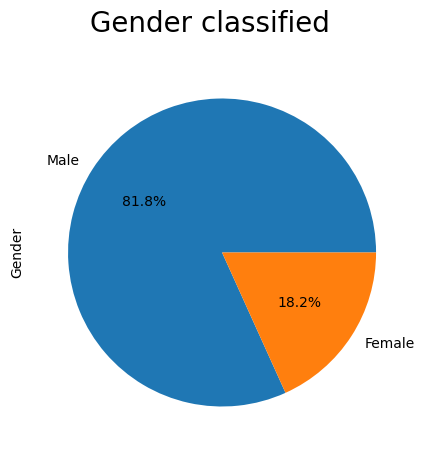

In [14]:
dataset['Gender'].value_counts().plot(kind='pie',figsize=(10,5),autopct='%1.1f%%')
plt.suptitle('Gender classified',fontsize=20)

In [15]:
dataset['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

Text(0.5, 0.98, 'Married Visualized')

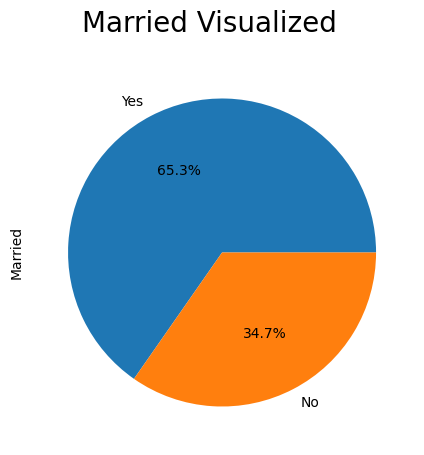

In [16]:
dataset['Married'].value_counts().plot(kind='pie',figsize=(10,5),autopct='%1.1f%%')
plt.suptitle('Married Visualized',fontsize=20)

In [17]:
dataset['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [18]:
dataset['Dependents']=dataset['Dependents'].str.replace('+','')

C:\Users\Admin\AppData\Local\Temp\ipykernel_1460\1962515842.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset['Dependents']=dataset['Dependents'].str.replace('+','')


In [19]:
dataset['Dependents']=dataset['Dependents'].astype(int)

In [20]:
dataset['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

Text(0.5, 0.98, 'Dependents classification')

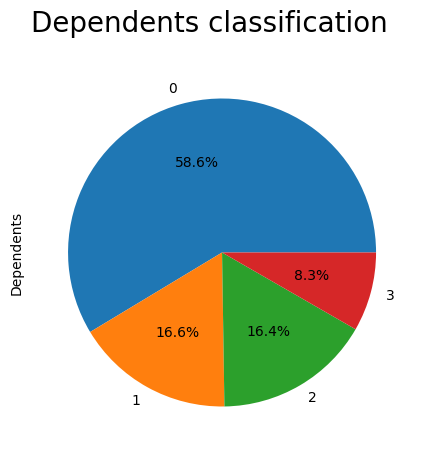

In [21]:
dataset['Dependents'].value_counts().plot(kind='pie',figsize=(10,5),autopct='%1.1f%%')
plt.suptitle('Dependents classification',fontsize=20)

In [22]:
dataset['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Text(0.5, 0.98, 'Education Classification')

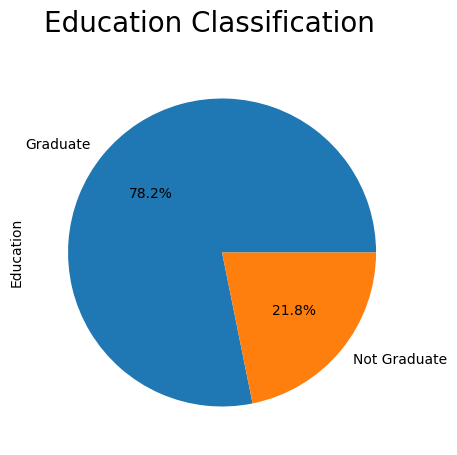

In [23]:
dataset['Education'].value_counts().plot(kind='pie',figsize=(10,5),autopct='%1.1f%%')
plt.suptitle('Education Classification',fontsize=20)

In [24]:
dataset['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

Text(0.5, 0.98, 'Classifying Self Employees')

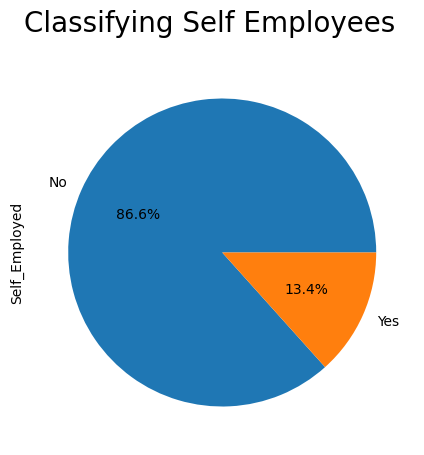

In [25]:
dataset['Self_Employed'].value_counts().plot(kind='pie',figsize=(10,5),autopct='%1.1f%%')
plt.suptitle('Classifying Self Employees',fontsize=20)

In [26]:
dataset['ApplicantIncome'].value_counts()

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

Text(0.5, 0.98, 'Applicant Income')

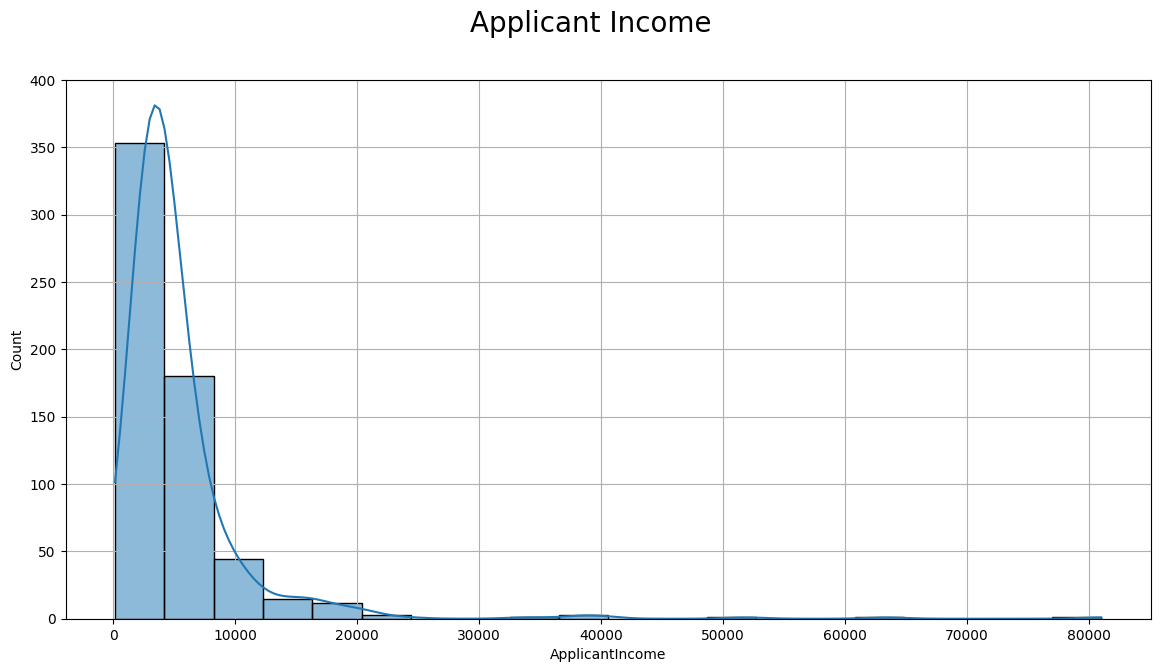

In [27]:
plt.figure(figsize=(14,7))
sns.histplot(data=dataset,x='ApplicantIncome',bins=20,kde=True)
plt.grid()
plt.suptitle('Applicant Income',fontsize=20)

In [28]:
dataset['CoapplicantIncome']=dataset['CoapplicantIncome'].astype(int)

In [29]:
dataset['CoapplicantIncome'].value_counts()

0       273
2500      5
2083      5
1666      5
2250      3
       ... 
2791      1
1010      1
1695      1
2598      1
240       1
Name: CoapplicantIncome, Length: 287, dtype: int64

Text(0.5, 0.98, 'Co-applicant income')

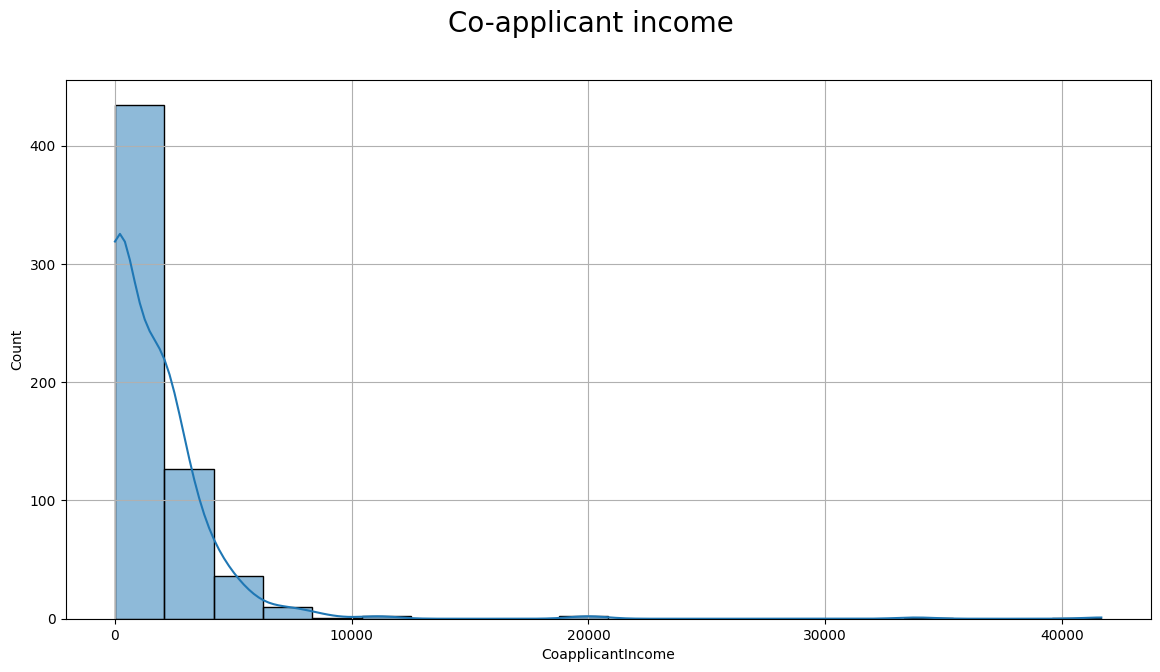

In [30]:
plt.figure(figsize=(14,7))
sns.histplot(data=dataset,x='CoapplicantIncome',bins=20,kde=True)
plt.grid()
plt.suptitle('Co-applicant income',fontsize=20)

In [31]:
dataset['LoanAmount']=dataset['LoanAmount'].astype(int)

In [32]:
dataset['LoanAmount'].value_counts()

128    33
120    20
110    17
100    15
160    12
       ..
240     1
214     1
59      1
166     1
253     1
Name: LoanAmount, Length: 203, dtype: int64

Text(0.5, 0.98, 'Loan Amount')

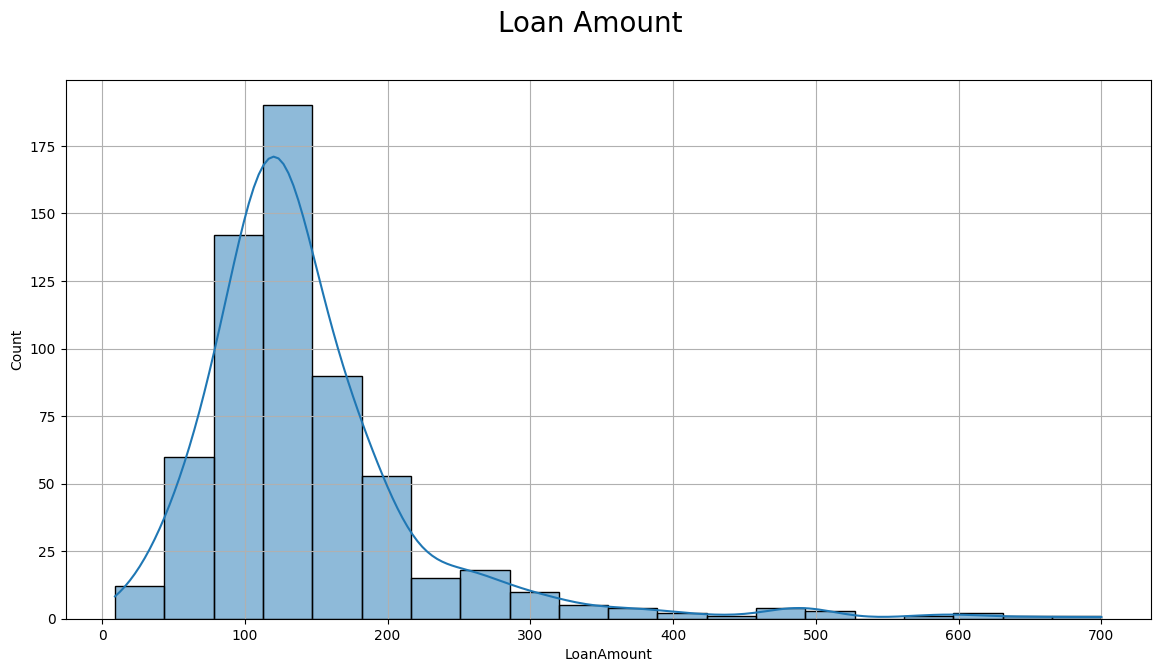

In [33]:
plt.figure(figsize=(14,7))
sns.histplot(data=dataset,x='LoanAmount',bins=20,kde=True)
plt.grid()
plt.suptitle('Loan Amount',fontsize=20)

In [34]:
dataset['Loan_Amount_Term']=dataset['Loan_Amount_Term'].astype(int)

In [35]:
dataset['Loan_Amount_Term'].value_counts()

360    526
180     44
480     15
300     13
240      4
84       4
120      3
60       2
36       2
12       1
Name: Loan_Amount_Term, dtype: int64

Text(0.5, 0.98, 'Loan Amount Term')

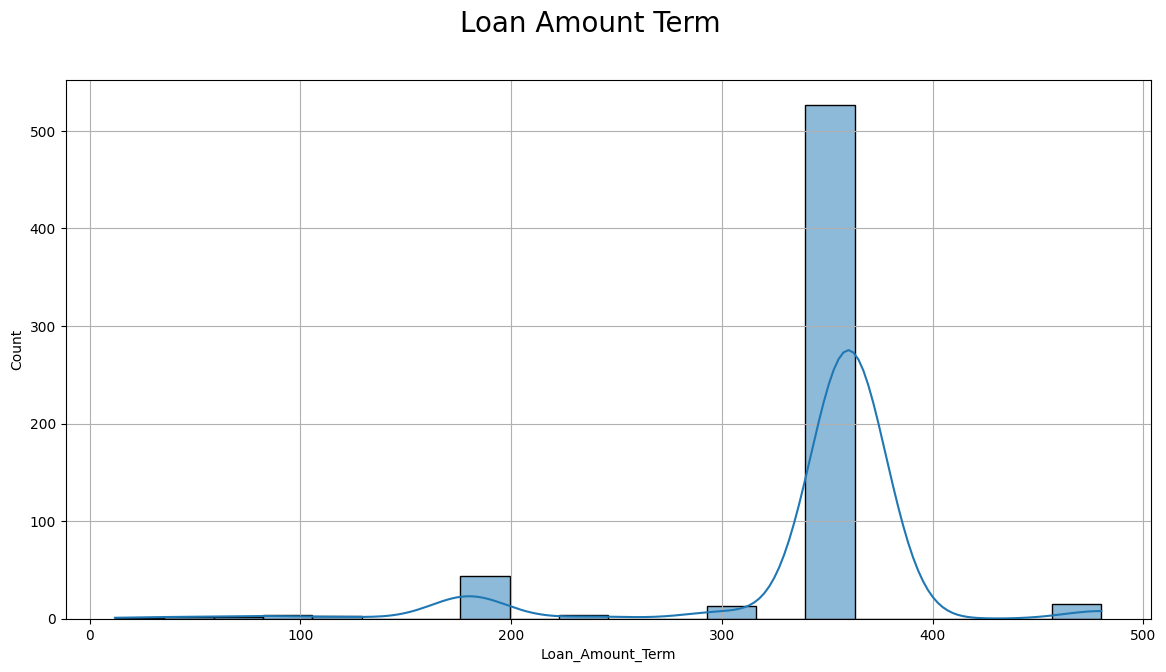

In [36]:
plt.figure(figsize=(14,7))
sns.histplot(data=dataset,x='Loan_Amount_Term',bins=20,kde=True)
plt.grid()
plt.suptitle('Loan Amount Term',fontsize=20)

In [37]:
dataset['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

Text(0.5, 0.98, 'Credit History')

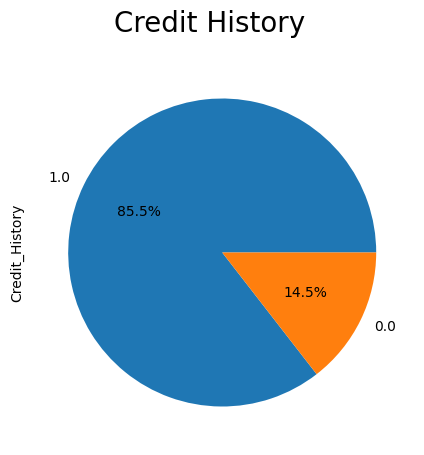

In [38]:
dataset['Credit_History'].value_counts().plot(kind='pie',figsize=(10,5),autopct='%1.1f%%')
plt.suptitle('Credit History',fontsize=20)

In [39]:
dataset['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Text(0.5, 0.98, 'Property Area')

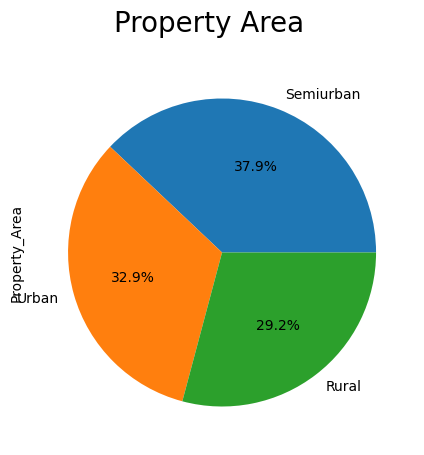

In [40]:
dataset['Property_Area'].value_counts().plot(kind='pie',figsize=(10,5),autopct='%1.1f%%')
plt.suptitle('Property Area',fontsize=20)

In [41]:
dataset['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Text(0.5, 0.98, 'Loan Status')

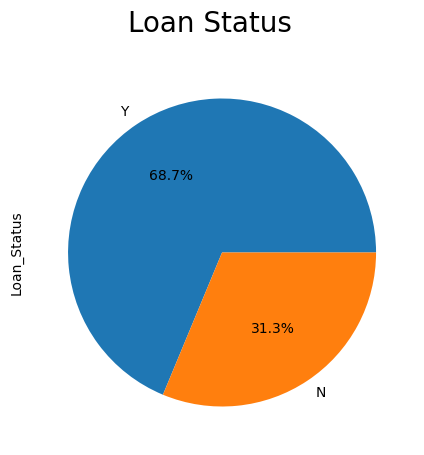

In [42]:
dataset['Loan_Status'].value_counts().plot(kind='pie',figsize=(10,5),autopct='%1.1f%%')
plt.suptitle('Loan Status',fontsize=20)

In [43]:
Married_ratio=dataset.groupby('Married')['Loan_ID'].count().reset_index()
Married_ratio

,Married,Loan_ID
0,No,213
1,Yes,401


Text(0.5, 0.98, 'Dependents ratio as per Gender')

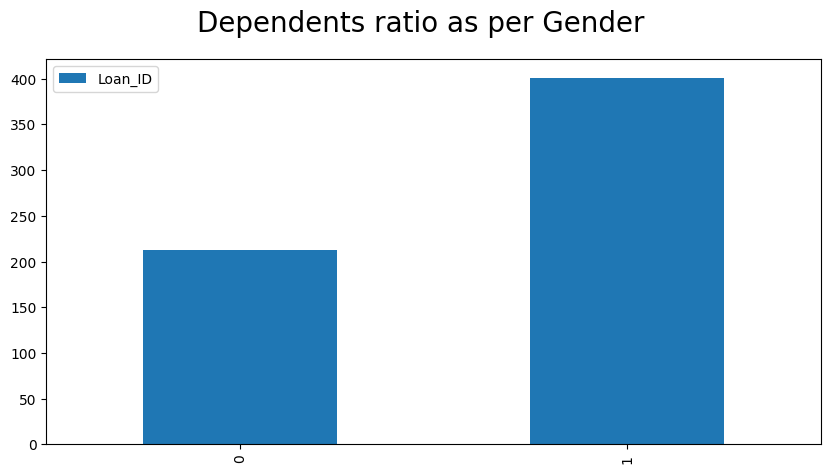

In [44]:
Married_ratio.plot(kind='bar',figsize=(10,5))
plt.suptitle('Dependents ratio as per Gender',fontsize=20)

In [45]:
educated_ratio=dataset.groupby('Education')['Loan_ID'].count().reset_index()
educated_ratio

,Education,Loan_ID
0,Graduate,480
1,Not Graduate,134


Text(0.5, 0.98, 'Educated Ratio based on Gender')

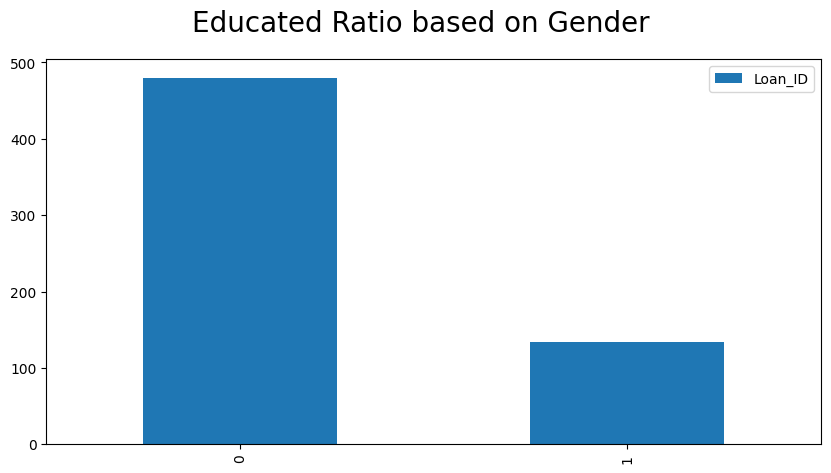

In [46]:
educated_ratio.plot(kind='bar',figsize=(10,5))
plt.suptitle('Educated Ratio based on Gender',fontsize=20)

In [47]:
self_employed_candidate=dataset.groupby('Self_Employed')['Loan_ID'].count().reset_index()
self_employed_candidate

,Self_Employed,Loan_ID
0,No,532
1,Yes,82


Text(0.5, 0.98, 'Self Employeed Candidate')

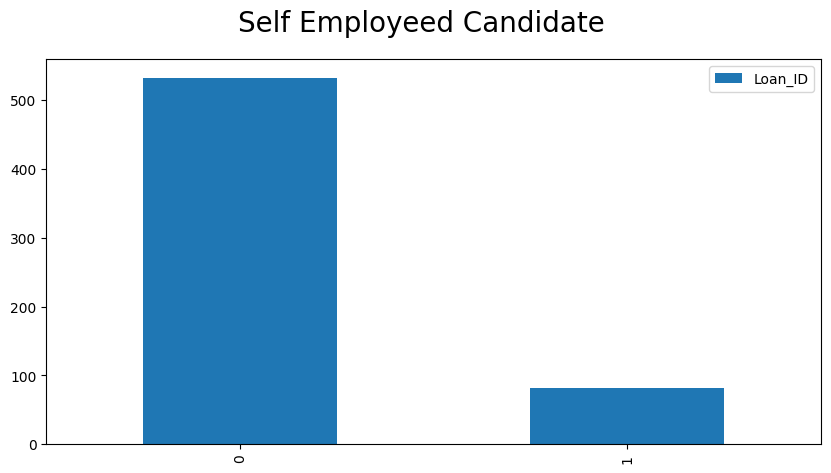

In [48]:
self_employed_candidate.plot(kind='bar',figsize=(10,5))
plt.suptitle('Self Employeed Candidate',fontsize=20)

In [49]:
gender_ratio=dataset.groupby('Gender')['Loan_ID'].count().reset_index()
gender_ratio

,Gender,Loan_ID
0,Female,112
1,Male,502


Text(0.5, 0.98, 'Gender Ratio')

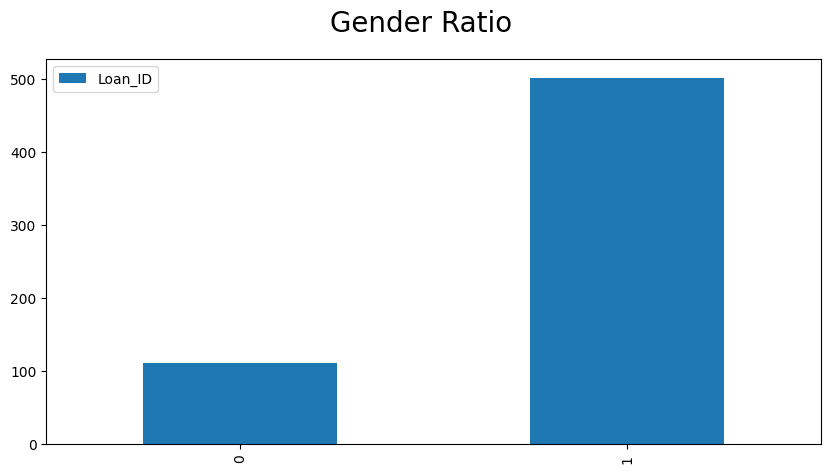

In [50]:
gender_ratio.plot(kind='bar',figsize=(10,5))
plt.suptitle('Gender Ratio',fontsize=20)

In [51]:
Total_loan_amount_on_gender=dataset.groupby('Gender')['LoanAmount'].sum().sort_values(ascending=True)
Total_loan_amount_on_gender

Gender
Female    14194
Male      75298
Name: LoanAmount, dtype: int32

Text(0.5, 0.98, 'Total_loan_amount_on_gender')

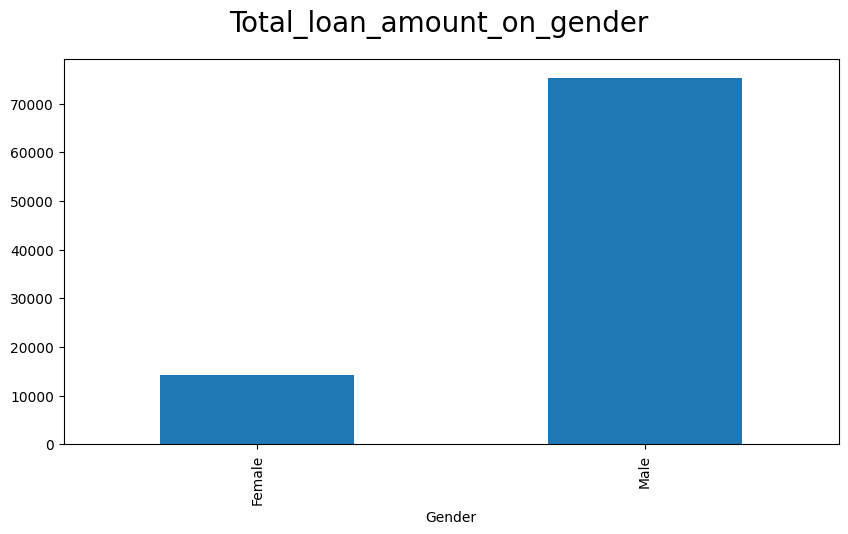

In [52]:
Total_loan_amount_on_gender.plot(kind='bar',figsize=(10,5))
plt.suptitle('Total_loan_amount_on_gender',fontsize=20)

In [53]:
applicant_income_gender=dataset.groupby('Gender')['ApplicantIncome'].sum().sort_values(ascending=True)
applicant_income_gender

Gender
Female     520069
Male      2797655
Name: ApplicantIncome, dtype: int64

Text(0.5, 0.98, 'applicant_income_gender')

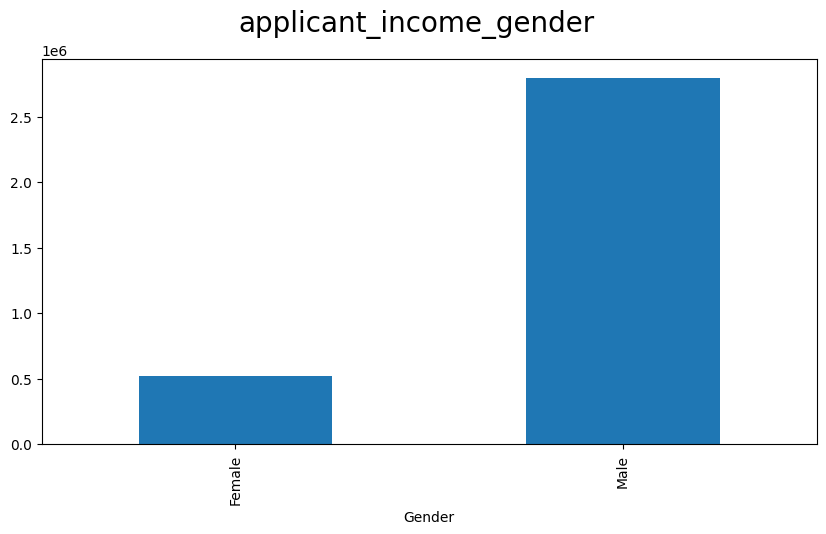

In [54]:
applicant_income_gender.plot(kind='bar',figsize=(10,5))
plt.suptitle('applicant_income_gender',fontsize=20)

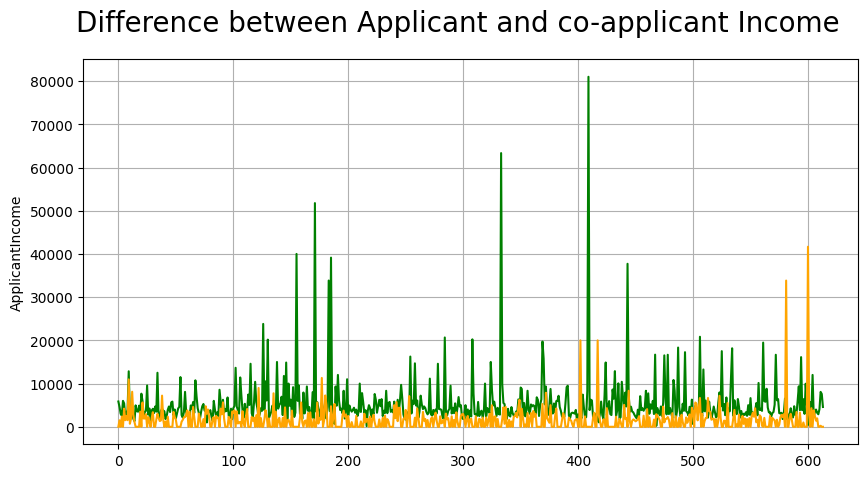

In [55]:
plt.figure(figsize=(10,5))
sns.lineplot(dataset['ApplicantIncome'],color='green')
sns.lineplot(dataset['CoapplicantIncome'],color='orange')
plt.suptitle('Difference between Applicant and co-applicant Income',fontsize=20)
plt.grid()

In [56]:
dataset['Ignoring_Co-Applicant_Income']=dataset['ApplicantIncome']-dataset['CoapplicantIncome']

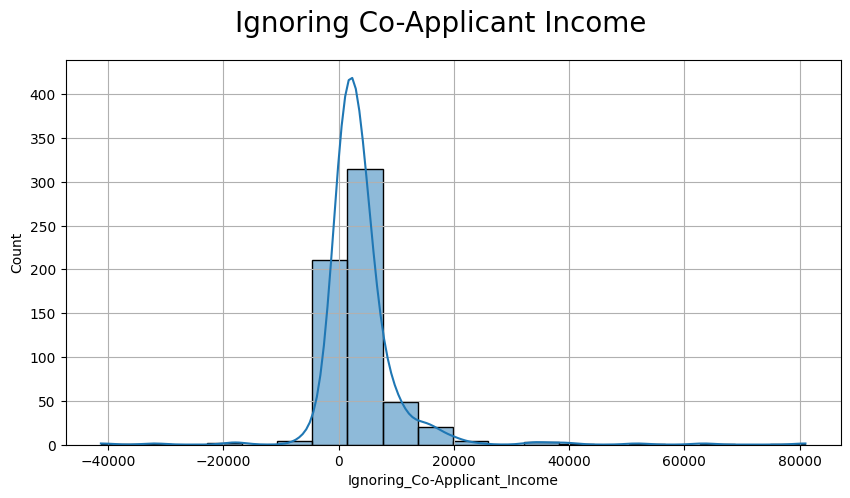

In [57]:
plt.figure(figsize=(10,5))
sns.histplot(data=dataset,x='Ignoring_Co-Applicant_Income',bins=20,kde=True,)
plt.suptitle('Ignoring Co-Applicant Income',fontsize=20)
plt.grid()

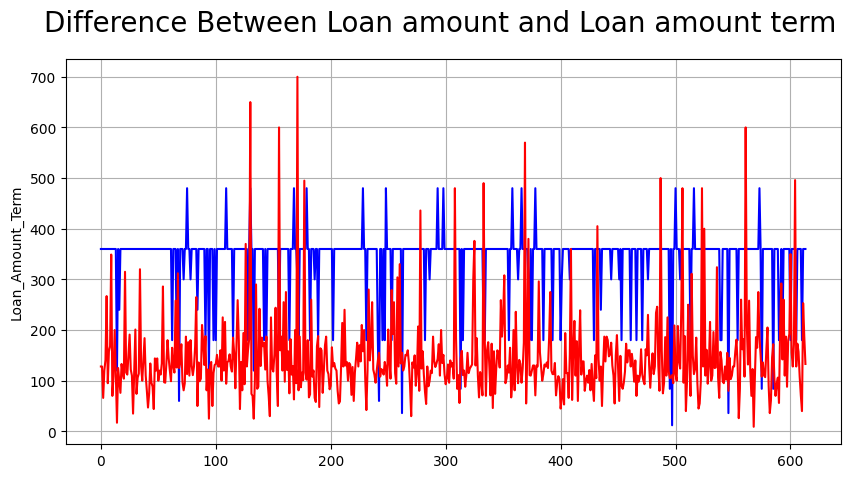

In [58]:
plt.figure(figsize=(10,5))
sns.lineplot(dataset['Loan_Amount_Term'],color='blue')
sns.lineplot(dataset['LoanAmount'],color='red')
plt.suptitle('Difference Between Loan amount and Loan amount term',fontsize=20)
plt.grid()

In [59]:
dataset['Ignoring_term_amount']=dataset['Loan_Amount_Term']-dataset['LoanAmount']

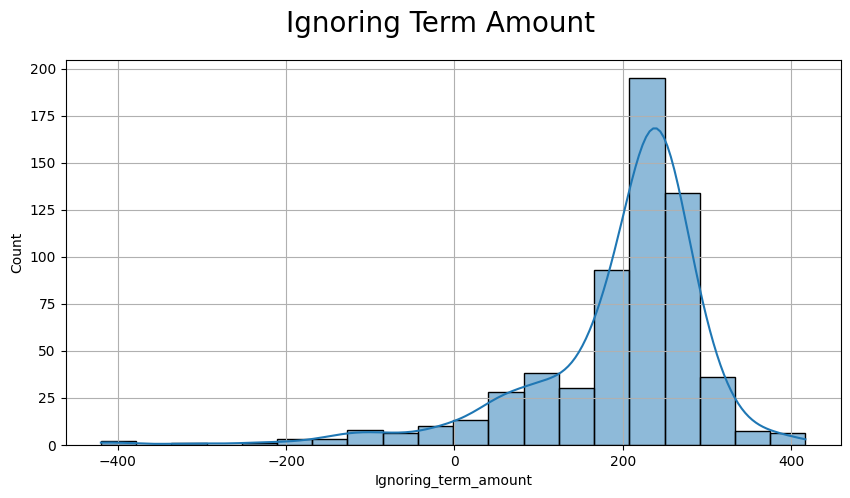

In [60]:
plt.figure(figsize=(10,5))
sns.histplot(data=dataset,x='Ignoring_term_amount',bins=20,kde=True,)
plt.suptitle('Ignoring Term Amount',fontsize=20)
plt.grid()

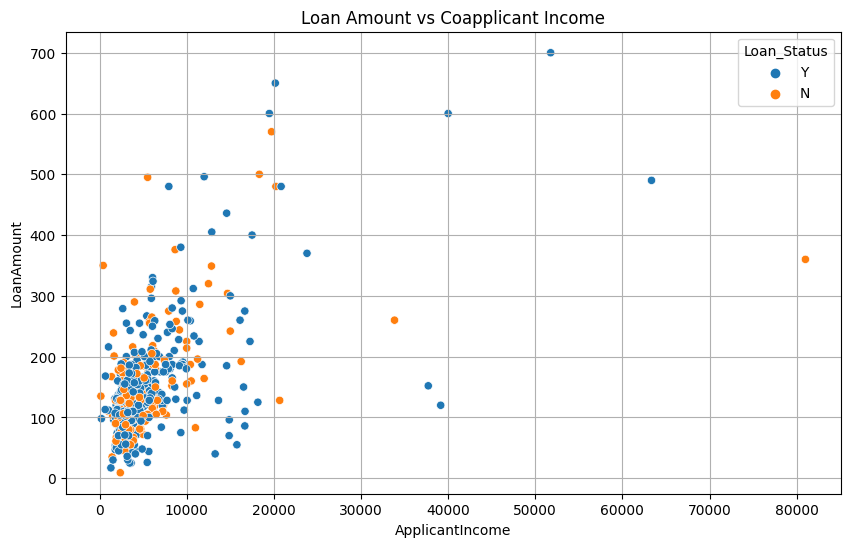

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status')
plt.title("Loan Amount vs Coapplicant Income")
plt.grid()

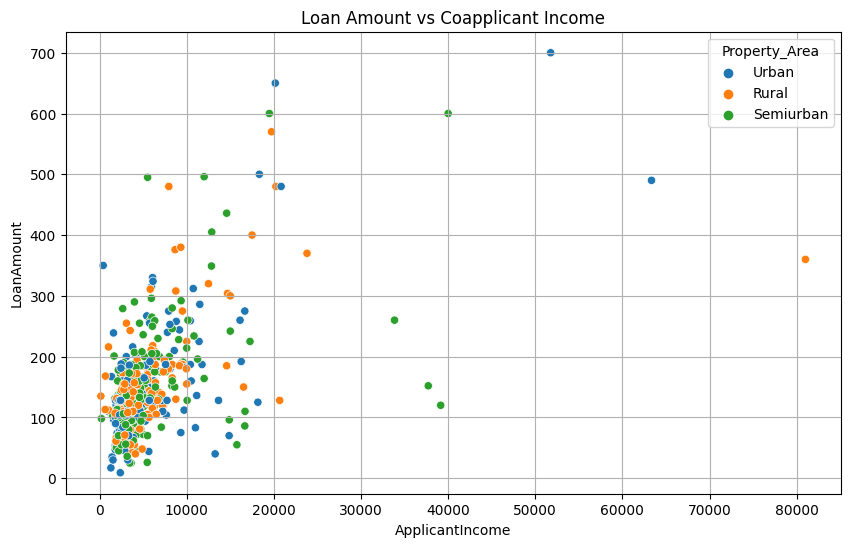

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='ApplicantIncome', y='LoanAmount', hue='Property_Area')
plt.title("Loan Amount vs Coapplicant Income")
plt.grid()

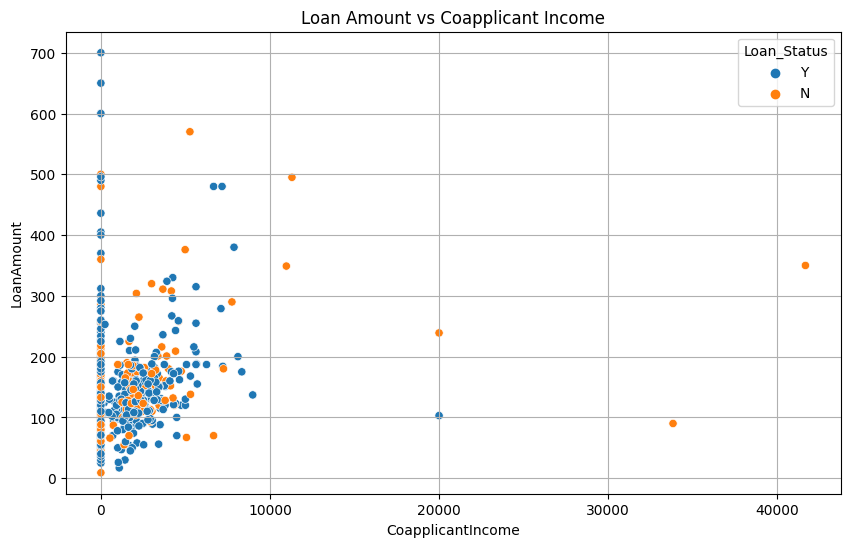

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='CoapplicantIncome', y='LoanAmount', hue='Loan_Status')
plt.title("Loan Amount vs Coapplicant Income")
plt.grid()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1460\1659846701.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')


Text(0.5, 0.98, 'Correlating the dataset')

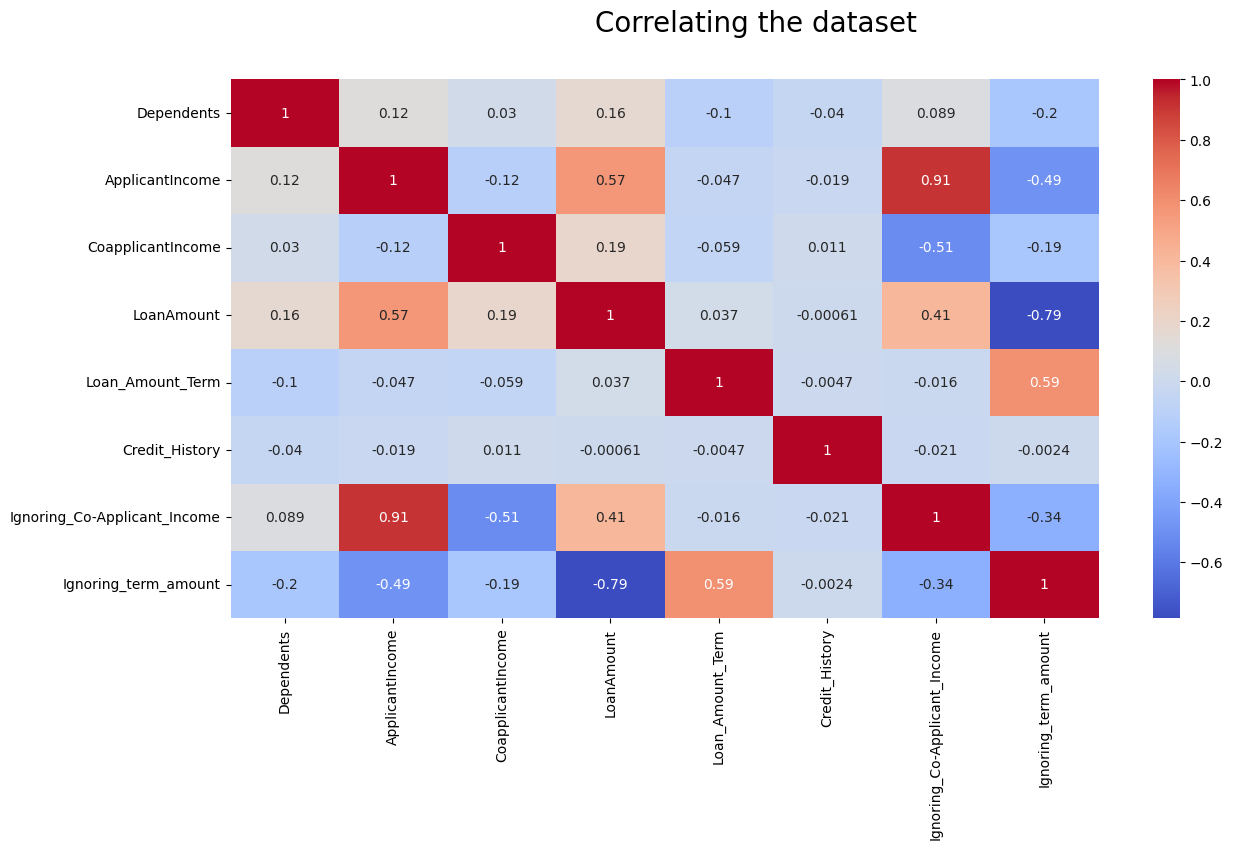

In [64]:
plt.figure(figsize=(14,7))
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')
plt.suptitle('Correlating the dataset',fontsize=20)

# Feature Engineering

In [65]:
dataset['Total_Income'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
dataset['Loan_Income_Ratio'] = dataset['LoanAmount'] / dataset['Total_Income']
dataset['Loan_Amount_Per_Term'] = dataset['LoanAmount'] / dataset['Loan_Amount_Term']

In [66]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Ignoring_Co-Applicant_Income,Ignoring_term_amount,Total_Income,Loan_Income_Ratio,Loan_Amount_Per_Term
0,LP001002,Male,No,0,Graduate,No,5849,0,128,360,1.0,Urban,Y,5849,232,5849,0.021884,0.355556
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1.0,Rural,N,3075,232,6091,0.021015,0.355556
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1.0,Urban,Y,3000,294,3000,0.022000,0.183333
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1.0,Urban,Y,225,240,4941,0.024287,0.333333
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1.0,Urban,Y,6000,219,6000,0.023500,0.391667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0,71,360,1.0,Rural,Y,2900,289,2900,0.024483,0.197222
610,LP002979,Male,Yes,3,Graduate,No,4106,0,40,180,1.0,Rural,Y,4106,140,4106,0.009742,0.222222
611,LP002983,Male,Yes,1,Graduate,No,8072,240,253,360,1.0,Urban,Y,7832,107,8312,0.030438,0.702778
612,LP002984,Male,Yes,2,Graduate,No,7583,0,187,360,1.0,Urban,Y,7583,173,7583,0.024660,0.519444


# ----- THE END ------